In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [2]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library(dplyr)
library(PCAtools)
library("pairwiseAdonis")

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggrepel


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


Loading required package: cluster



In [3]:
#rm(, large_list, large_vector, temp_variables)

In [4]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids




Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [5]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [6]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [7]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples & Alias!="AcroporaDisease"
                       )

ps.coral


ps.coral_TL_reef =subset_samples(ps.coral, Biome=="Field")
ps.coral_TL_reef
                 
ps.coral_TL_meso =subset_samples(ps.coral, Biome=="Aquaria")
ps.coral_TL_meso    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2268 samples ]
sample_data() Sample Data:       [ 2268 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1180 samples ]
sample_data() Sample Data:       [ 1180 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1088 samples ]
sample_data() Sample Data:       [ 1088 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [8]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral
  
ps.coral_TL_reef = filter_taxa(ps.coral_TL_reef, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral_TL_reef
                          
ps.coral_TL_meso = filter_taxa(ps.coral_TL_meso, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral_TL_meso                                            


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 243 taxa and 2268 samples ]
sample_data() Sample Data:       [ 2268 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 243 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 349 taxa and 1180 samples ]
sample_data() Sample Data:       [ 1180 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 349 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 270 taxa and 1088 samples ]
sample_data() Sample Data:       [ 1088 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 270 taxa by 8 taxonomic ranks ]

In [9]:
ps.coral_clr <- microbiome::transform(ps.coral, 'clr')
ps.coral_TL_reef_CLR <- microbiome::transform(ps.coral_TL_reef, 'clr')
ps.coral_TL_meso_CLR <- microbiome::transform(ps.coral_TL_meso, 'clr')

In [10]:
#ps.coral_clr.ord <- ordinate(ps.coral_clr, "RDA", "euclidean")
#ps.coral_TL_meso_ord <- ordinate(ps.coral_TL_meso_CLR, "RDA", "euclidean")

#ps.coral_TL_reef_ord <- ordinate(ps.coral_TL_reef_CLR, "RDA", "euclidean")

### Tissue_type

missing observations due to 'group' removed




	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group =
sample_data(ps.coral)$tissue_type)

No. of Positive Eigenvalues: 243
No. of Negative Eigenvalues: 0

Average distance to median:
   AH    DL    DU 
15897 38532 13442 

Eigenvalues for PCoA axes:
(Showing 8 of 243 eigenvalues)
    PCoA1     PCoA2     PCoA3     PCoA4     PCoA5     PCoA6     PCoA7     PCoA8 
1.055e+12 6.995e+11 3.449e+11 2.422e+11 1.564e+11 1.340e+11 1.010e+11 8.397e+10 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       2 2.3137e+11 1.1569e+11 88.898    999  0.001 ***
Residuals 1934 2.5168e+12 1.3013e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
            diff        lwr        upr     p adj
DL-AH  22635.170  18317.322  26953.018 0.0000000
DU-AH  -2455.123  -7870.508   2960.263 0.5370094
DU-DL -25090.292 -30867.348 -19313.236 0.0000000


ERROR: Error in qr.fitted(qrhs, G): 'qr' and 'y' must have the same number of rows


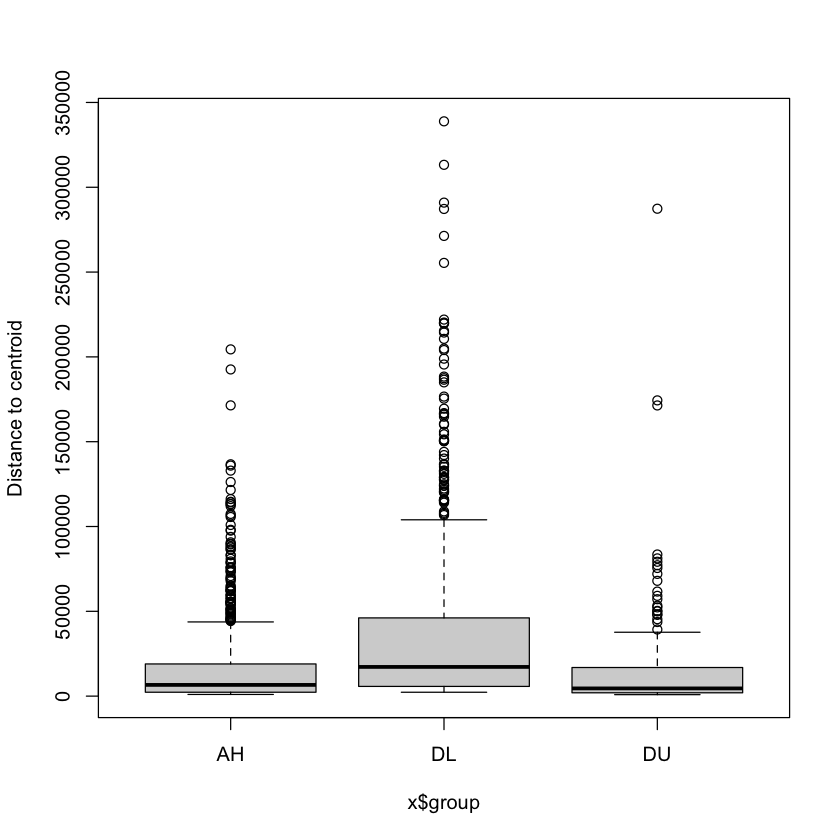

In [12]:
dis_clr <- vegdist(otu_table(t(ps.coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$tissue_type)
mod_clr
#permutest(mod_clr, pairwise = TRUE, permutations = 999)
boxplot(mod_clr)
permutest(mod_clr, permutations = how(nperm=999))
TukeyHSD(mod_clr)


ps_clr_meta= as(sample_data(ps.coral), "data.frame")


adonis2(dis_clr~ tissue_type, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)


pairwise.adonis(dis_clr, ps_clr_meta$tissue_type, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

### Biome


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       1 1.5771e+11 1.5771e+11 134.01    999  0.001 ***
Residuals 2266 2.6668e+12 1.1769e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biome,1,8.756918e+10,0.02295709,53.24308,0.001
Residual,2266,3.726902e+12,0.97704291,NA,NA
Total,2267,3.814471e+12,1.00000000,NA,NA


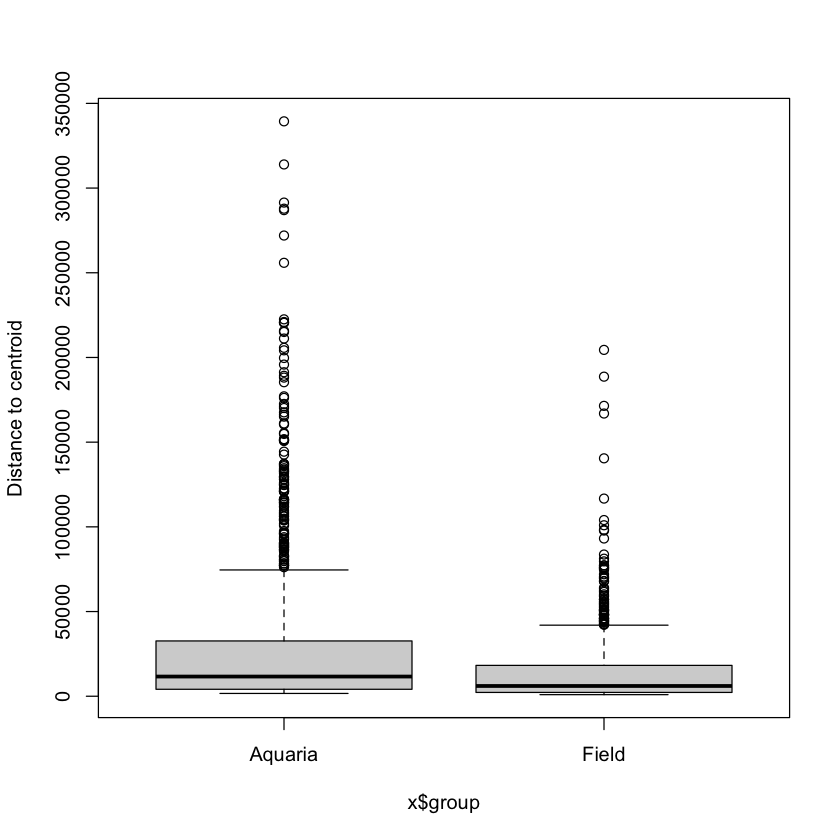

In [14]:
#dis_clr <- vegdist(otu_table(t(ps.coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$Biome)

boxplot(mod_clr)
permutest(mod_clr, permutations = how(nperm=999))

adonis2(dis_clr~Biome, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)




### Primers


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       4 2.6033e+11 6.5083e+10 57.422    999  0.001 ***
Residuals 2263 2.5649e+12 1.1334e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
primer_names,4,9.744277e+10,0.02554555,14.83127,0.001
Residual,2263,3.717028e+12,0.97445445,NA,NA
Total,2267,3.814471e+12,1.00000000,NA,NA


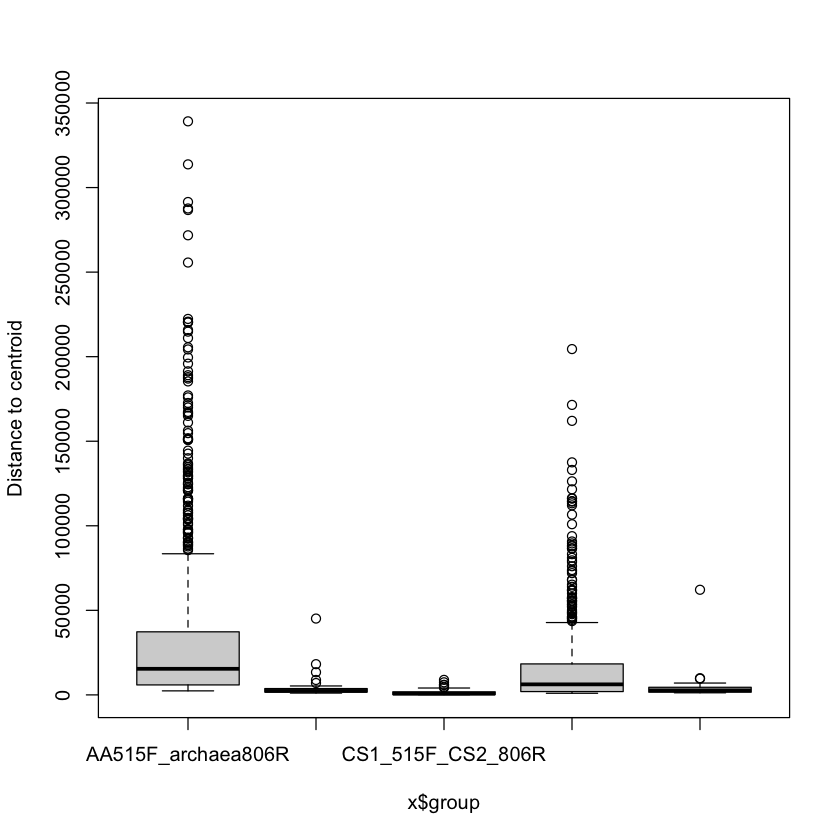

In [18]:
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$primer_names)
permutest(mod_clr, permutations = how(nperm=999))
boxplot(mod_clr)

adonis2(dis_clr~primer_names, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)

### Species

missing observations due to 'group' removed




Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups      12 1.3105e+11 1.0921e+10 8.2803    999  0.001 ***
Residuals 1924 2.5375e+12 1.3189e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in qr.fitted(qrhs, G): 'qr' and 'y' must have the same number of rows


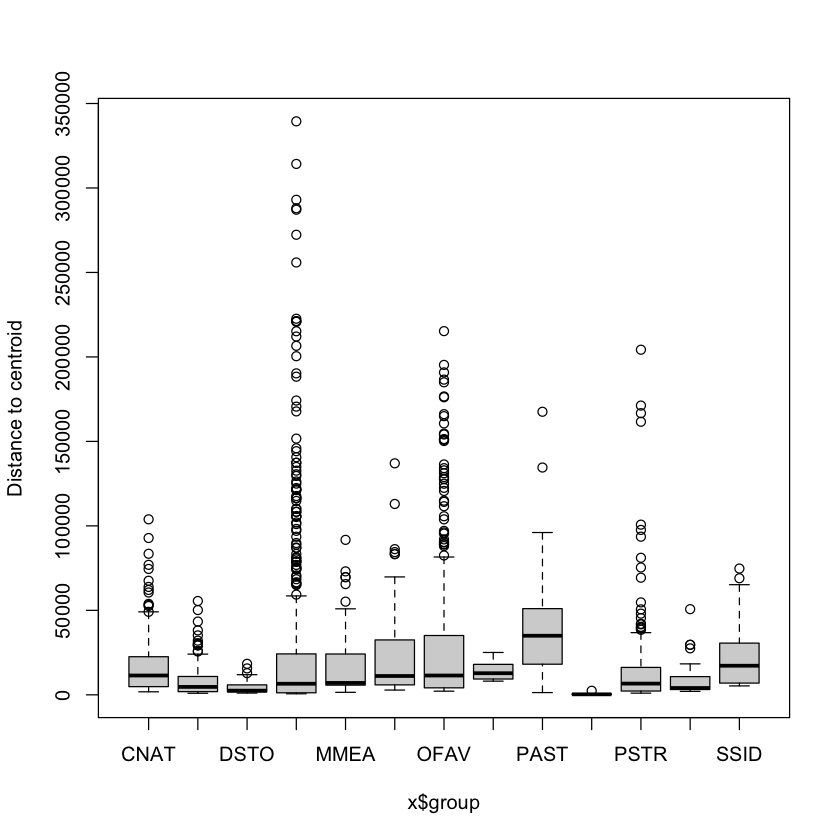

In [19]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$species_code)

boxplot(mod_clr)

permutest(mod_clr, permutations = how(nperm=999))


adonis2(dis_clr~species_code, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)



### Sample type


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       4 1.1295e+11 2.8239e+10 23.333    999  0.001 ***
Residuals 2263 2.7388e+12 1.2102e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_type,4,9.911154e+10,0.02598303,15.09204,0.001
Residual,2263,3.715360e+12,0.97401697,NA,NA
Total,2267,3.814471e+12,1.00000000,NA,NA


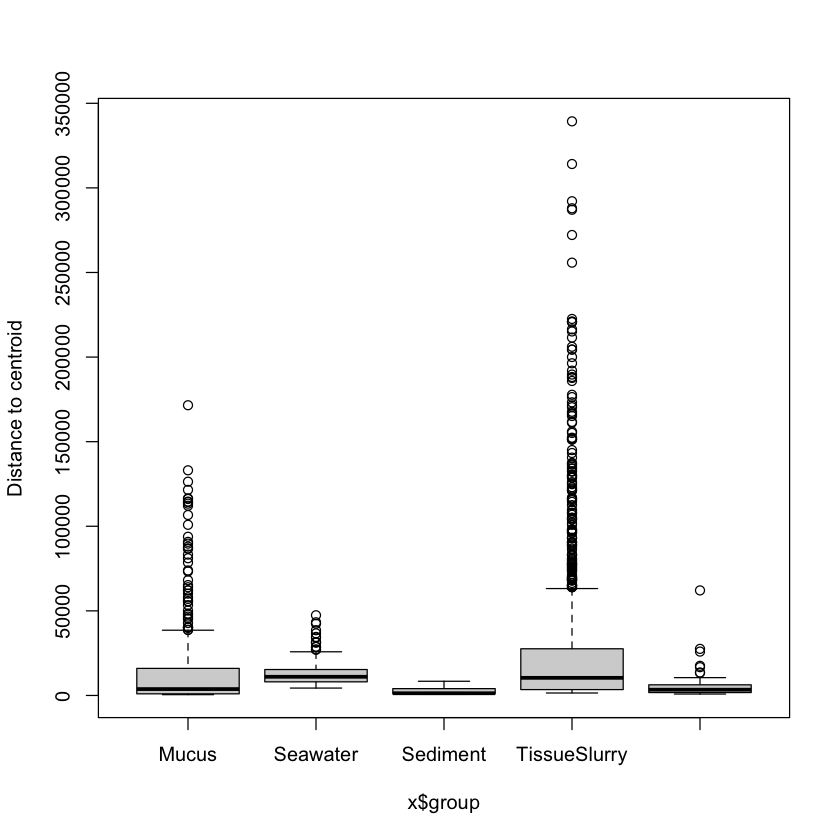

In [20]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$sample_type)

boxplot(mod_clr)
permutest(mod_clr, permutations = how(nperm=999))




adonis2(dis_clr~sample_type, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)



### Study


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups      14 8.1015e+11 5.7868e+10 70.373    999  0.001 ***
Residuals 2253 1.8527e+12 8.2231e+08                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alias,14,4.183989e+11,0.1096873,19.82653,0.001
Residual,2253,3.396072e+12,0.8903127,NA,NA
Total,2267,3.814471e+12,1.0000000,NA,NA


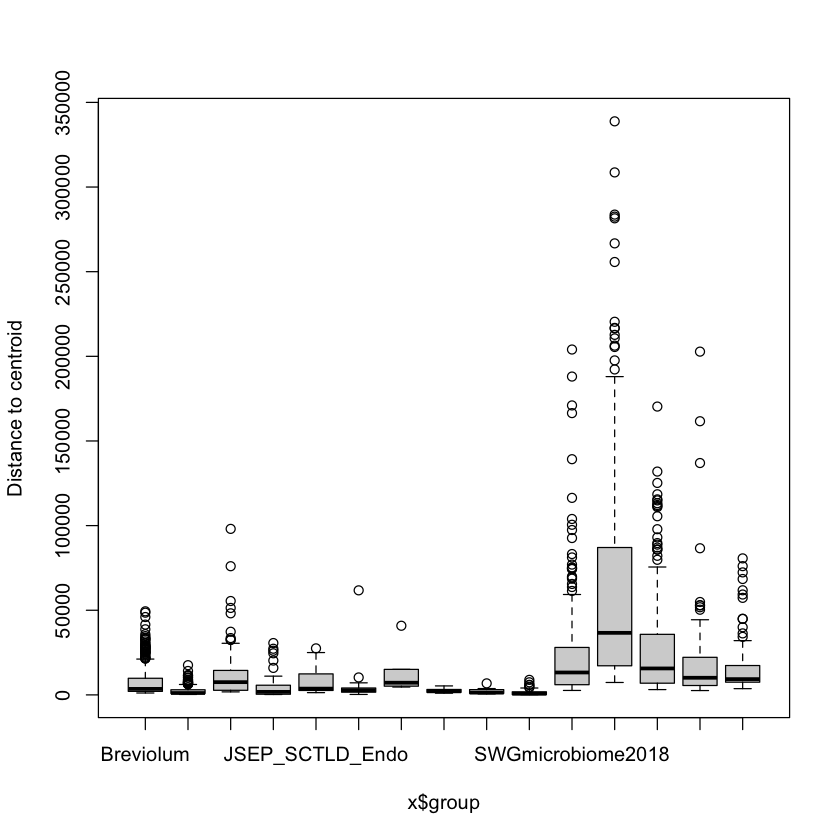

In [21]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$Alias)
boxplot(mod_clr)
permutest(mod_clr, permutations = how(nperm=999))


adonis2(dis_clr~Alias, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean")


### Year


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq     F N.Perm Pr(>F)    
Groups       4 1.8497e+11 4.6243e+10 39.32    999  0.001 ***
Residuals 2263 2.6614e+12 1.1761e+09                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
collection_year,4,9.654891e+10,0.02531122,14.69169,0.001
Residual,2263,3.717922e+12,0.97468878,NA,NA
Total,2267,3.814471e+12,1.00000000,NA,NA


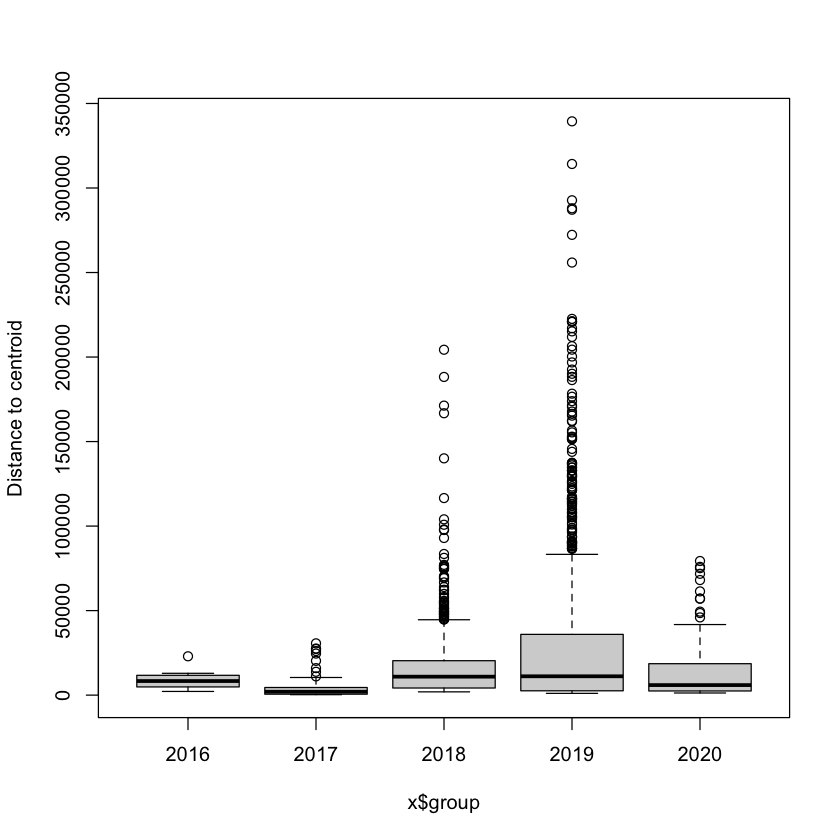

In [22]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$collection_year)

boxplot(mod_clr)


permutest(mod_clr, permutations = how(nperm=999))


adonis2(dis_clr~collection_year, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", block=Study)




In [23]:
ps_clr_df=as.data.frame(otu_table(ps.coral_clr))
ps_clr_meta= as(sample_data(ps.coral_clr), "data.frame")

In [24]:
ps_clr_meta_edit = ps_clr_meta %>% 
#as.tibble() %>% 
#dplyr::rename("Biome" = environment_.biome.) %>% 
dplyr::rename("Dissease.Status" = tissue_type) %>%
dplyr::rename("Sample.Type" = sample_type) %>%
dplyr::rename("Coral.Species" = species_code) %>%
dplyr::rename("Year" = collection_year) %>%
dplyr::rename("Zone" = SCTLD_status) %>%
dplyr::rename("Primers" = primer_names)
head(ps_clr_meta_edit)

,SampleID,BioSample,Run,SRA_accession,Lab,Experiment,Alias,Study,Collection_ID,Species_counts,⋯,Primers,forwardPrimer,ReversePrimer,linkerPrimerSequence,platform,platformChemistry,sequencing_facility,barcodes,basepairs,notes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
100tiss_S31,100tiss_S31,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,100tiss,High,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA
102tiss_S3,102tiss_S3,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,102tiss,Low,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA
104tiss_S32,104tiss_S32,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,104tiss,High,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA
168eco_S8,168eco_S8,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,168eco,NA,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA
171eco_S9,171eco_S9,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,171eco,NA,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA
172eco_S10,172eco_S10,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,172eco,NA,⋯,Pr515_806RAp,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA


In [25]:
 p <- pca(ps_clr_df, metadata = ps_clr_meta_edit, removeVar = 0.1)

-- removing the lower 10% of variables based on variance



Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Study is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Primers is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Biome is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Coral.Species is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Dissease.Status is not numeric - please check the source data as non-numeric variable

Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

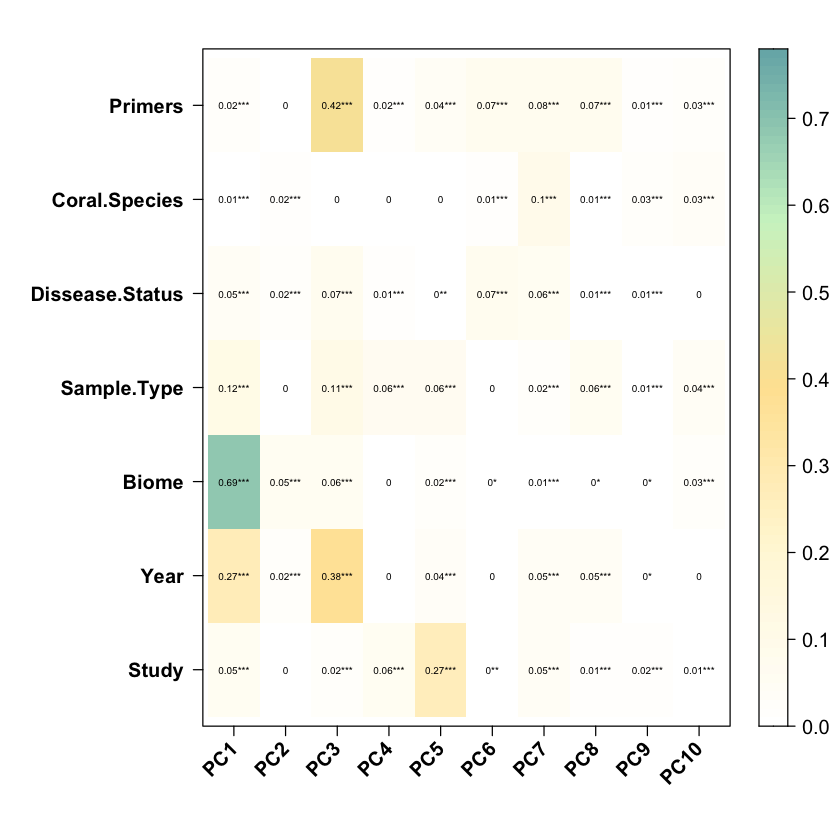

In [27]:
 eigencorplot(p,
    metavars = c("Study", "Primers", "Biome", "Coral.Species", 
                 "Dissease.Status", "Sample.Type", "Year"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [32]:
jpeg("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/PC_R2.jpeg", width = 5.5, height = 5,
     units = 'in', res = 300)

 eigencorplot(p,
    metavars = c("Study", "Primers", "Biome", "Coral.Species", 
                 "Dissease.Status", "Sample.Type", "Year"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')
    #signifSymbols = c( '***', '**', '*', ''),
    #signifCutpoints = c( 0, 0.01, 0.05, 1))

dev.off()

Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Study is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Primers is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Biome is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Coral.Species is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Dissease.Status is not numeric - please check the source data as non-numeric variable

Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

pdf 
  2